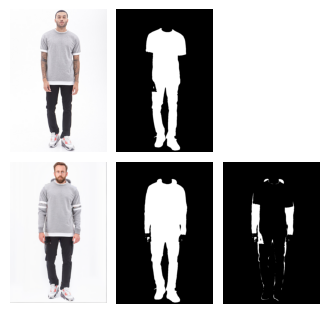

In [22]:
import PIL.ImageOps
import numpy as np
from PIL import Image
from PIL import ImageChops
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

embedding_name = ("fabhsr")

transformed_images_folder = "embedding_datasets/" + embedding_name + "/results/transform-all/"
dataset_folder = "datasets/deep-fashion/In-shop Clothes Retrieval Benchmark/Img/"
image_path = "img_highres/MEN/Denim/id_00003074/01_1_front.jpg"

def grand_sum(image: Image):
    return np.sum(np.array(image) == True)

mask_path = (".".join(image_path.split(".")[:-1])) + "_mask_sam.png"
gt_mask_path = (".".join(image_path.split(".")[:-1])) + "_mask.png"

M_transformed_path = transformed_images_folder + mask_path
M_groundtruth_path = dataset_folder + gt_mask_path
M_original_path = dataset_folder + mask_path

M_groundtruth = Image.open(M_groundtruth_path).convert("1")
M_transformed = PIL.ImageOps.invert(Image.open(M_transformed_path).convert("1"))
M_original = PIL.ImageOps.invert(Image.open(M_original_path).convert("1"))

# due to vae encoding image dimensions are rounded to be divisible by 8
# possibly introduces some pixel shift worsening this metric by a very small percentage
M_transformed = M_transformed.resize(M_original.size)

M_original_filled =  ImageChops.logical_or(M_original,M_groundtruth)
M_transformed_filled = ImageChops.logical_or(M_transformed,M_groundtruth)

M_overlap =  ImageChops.subtract(M_transformed_filled,M_original_filled)

I_original_path = dataset_folder + image_path
I_original = Image.open(I_original_path)

I_transformed_path = transformed_images_folder + image_path + "_00001_.png"
I_transformed = Image.open(I_transformed_path)

fig = plt.figure(figsize=(4., 6.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.1, )

for ax, im in zip(grid,
                  [ I_original,  M_original_filled,None,
                    I_transformed,  M_transformed_filled,
                      M_overlap, 
                   ]):
    # Iterating over the grid returns the Axes.
    if im is not None:
        ax.imshow(im)
    ax.axis("off")
plt.savefig('plots/mask_overlap_example.png', format='png', dpi=1000, bbox_inches='tight')